In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

from mle_toolbox.utils import load_result_logs

# ODE Integration Example
### Load in meta-log and hyper-log files

- The meta-log stores all detailed training logs (e.g. training curves, etc.)
- The hyper-log stores all aggregated training results

In [2]:
# Load log and get overview of different logged runs
meta_log, hyper_log = load_result_logs("../examples/experiments/ode/")
list(meta_log.b_1_eval_3.time.keys())

['step_counter', 'time_elapsed']

In [3]:
# And here are the different items stored in the log
print("Outer level:", list(meta_log.b_1_eval_0.keys()))
print("Meta level:", list(meta_log.b_1_eval_0.meta.keys()))
print("Time level:", list(meta_log.b_1_eval_0.time.keys()))
print("Stats level:", list(meta_log.b_1_eval_0.stats.keys()))

Outer level: ['meta', 'stats', 'time']
Meta level: ['config_fname', 'eval_id', 'experiment_dir', 'fig_storage_paths', 'log_paths', 'model_ckpt', 'model_type', 'seeds']
Time level: ['step_counter', 'time_elapsed']
Stats level: ['integral', 'noise']


In [4]:
# The meta data stores all the data relevant for recovering parts of the experiment
meta_log.b_1_eval_0.meta.model_ckpt

array(['experiments/ode/21-04-09_b_1_eval_0/models/final/21-04-09_b_1_eval_0_seed_732820',
       'experiments/ode/21-04-09_b_1_eval_0/models/final/21-04-09_b_1_eval_0_seed_989161'],
      dtype='<U200')

### Visualize a Time Series/Learning Curve

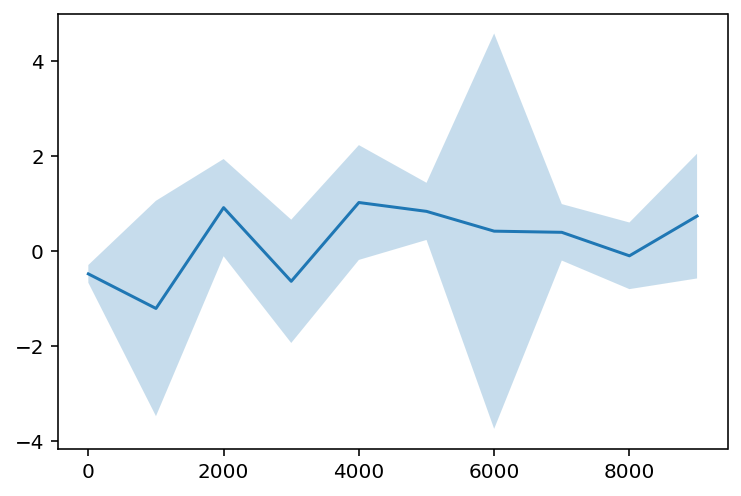

In [5]:
# If you want to get access to a specific variable just index it!
import matplotlib.pyplot as plt
plt.plot(meta_log.b_1_eval_0.time.step_counter.mean,
         meta_log.b_1_eval_0.stats.noise.mean)
plt.fill_between(meta_log.b_1_eval_0.time.step_counter.mean,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 - 2 * meta_log.b_1_eval_0.stats.noise.std,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 + 2 * meta_log.b_1_eval_0.stats.noise.std,
                 alpha=0.25)

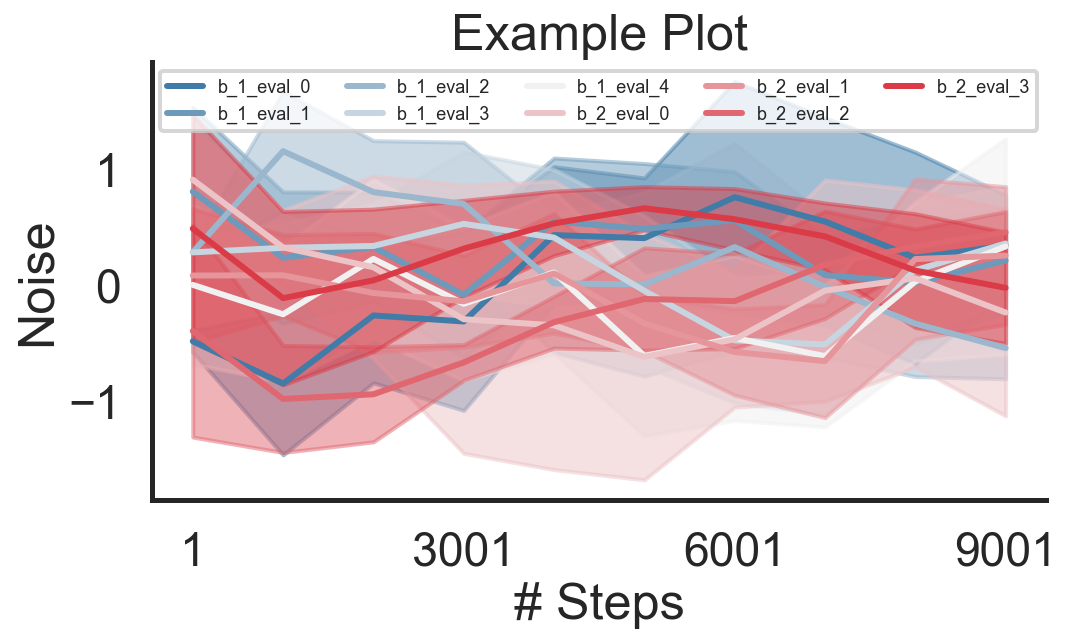

In [6]:
from mle_toolbox.visualize import visualize_1D_lcurves

fig, ax = visualize_1D_lcurves(meta_log,
                               iter_to_plot="step_counter",
                               target_to_plot="noise",
                               smooth_window=3,
                               plot_title= "Example Plot",
                               xy_labels = [r"# Steps",
                                            r"Noise"],
                               base_label=r"{}",
                               curve_labels=[],
                               every_nth_tick= 3,
                               plot_std_bar= True)
ax.legend(ncol=5, fontsize=9)

### Plot 2D Heatmap of tracked variable

In [7]:
hyper_log.columns

Index(['noise_mean', 'x_0', 'time_elapsed', 'run_id', 'integral', 'noise',
       'log_paths', 'experiment_dir', 'config_fname', 'model_ckpt', 'seeds',
       'model_type', 'fig_storage_paths', 'log_fname'],
      dtype='object')

In [8]:
hyper_log.log_paths.iloc[0]

array(['experiments/ode/21-04-09_b_1_eval_0/logs/21-04-09_b_1_eval_0_seed_732820.hdf5',
       'experiments/ode/21-04-09_b_1_eval_0/logs/21-04-09_b_1_eval_0_seed_989161.hdf5'],
      dtype='<U200')

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff74e9c9898>)

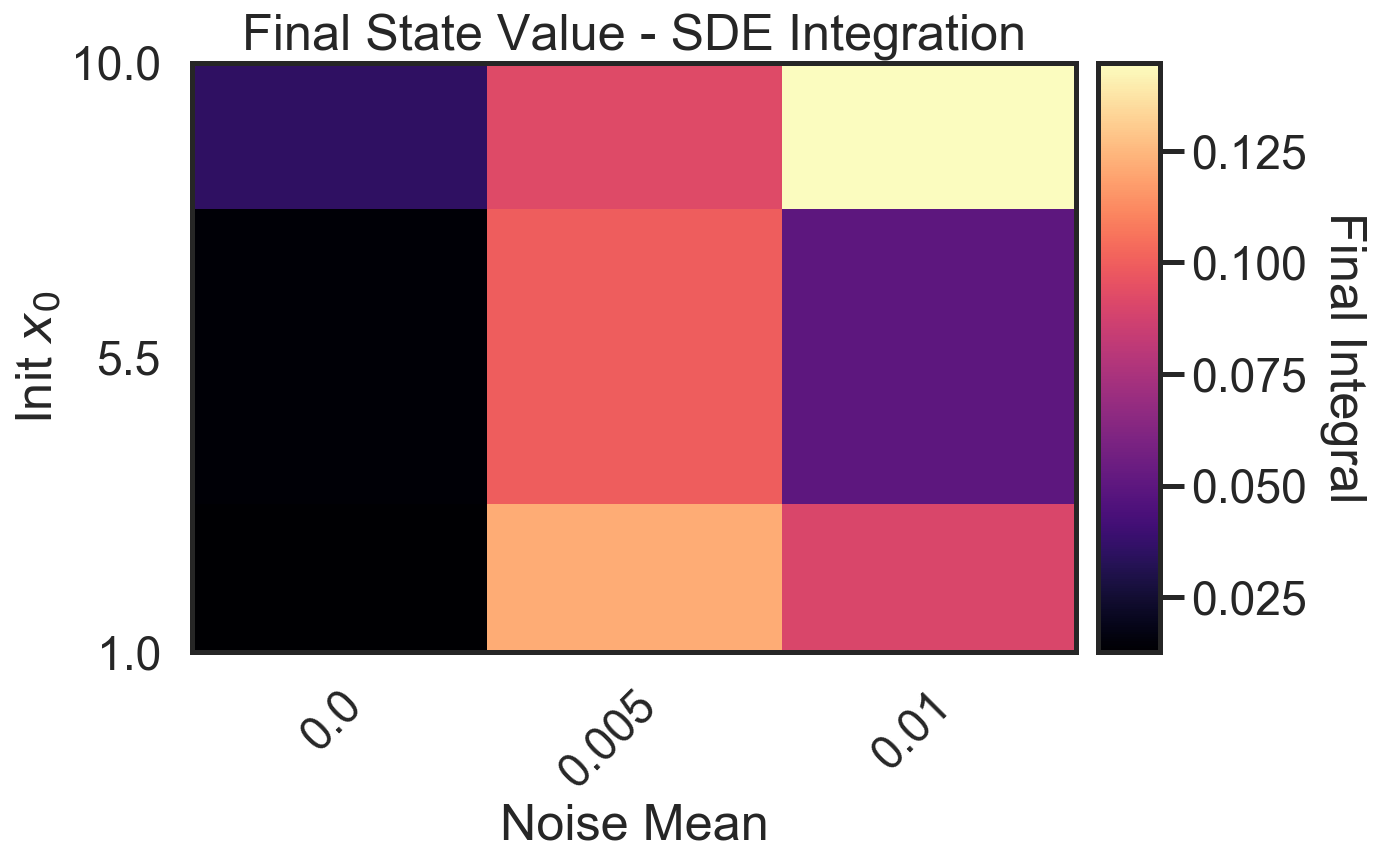

In [9]:
from mle_toolbox.visualize import visualize_2D_grid
fixed_params = None
params_to_plot = ["noise_mean", "x_0"]
target_to_plot = "integral"
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Final State Value - SDE Integration',
                  xy_labels=[r'Noise Mean', r'Init $x_0$'],
                  variable_name='Final Integral',
                  every_nth_tick=1, round_ticks=3,
                  text_in_cell=False, max_heat=None)

# VAE Training Example
### Reload trained network for stored checkpoint

In [10]:
# Load log and get overview of different logged runs
meta_log, hyper_log = load_result_logs("../examples/experiments/vae/")
print(meta_log.b_1_eval_0.meta.top_k_performance)
print(meta_log.b_1_eval_0.meta.top_k_ckpt_list)

[['119.30412' '119.36492']
 ['111.32151' '122.31149']]
[['experiments/vae/21-04-09_b_1_eval_0/models/top_k/21-04-09_b_1_eval_0_seed_501991_top_0.pkl'
  'experiments/vae/21-04-09_b_1_eval_0/models/top_k/21-04-09_b_1_eval_0_seed_501991_top_1.pkl']
 ['experiments/vae/21-04-09_b_1_eval_0/models/top_k/21-04-09_b_1_eval_0_seed_568451_top_0.pkl'
  'experiments/vae/21-04-09_b_1_eval_0/models/top_k/21-04-09_b_1_eval_0_seed_568451_top_1.pkl']]


In [11]:
from mle_toolbox.utils import load_model_ckpt

jax_params = load_model_ckpt(
                ckpt_path="../examples/" + meta_log.b_1_eval_0.meta.top_k_ckpt_list[0][0],
                model_type="jax", model=None)

# For torch model you will have to also supply the model class!

### Subselect the Meta Log and the Hyper Log

In [12]:
from mle_toolbox.utils import subselect_hyper_log, subselect_meta_log

In [13]:
# Get experiment run with param closest to selected
sub_hyper = subselect_hyper_log(hyper_log,
                                param_name="l_rates",
                                param_value=0.001)
sub_hyper

,l_rates,time_elapsed,run_id,val_loss,log_paths,experiment_dir,config_fname,model_ckpt,seeds,model_type,log_fname
0,0.001,41.319318,b_1_eval_0,115.312817,[experiments/vae/21-04-09_b_1_eval_0/logs/21-0...,experiments/vae/21-04-09_b_1_eval_0/,experiments/vae/21-04-09_b_1_eval_0/21-04-09_b...,[experiments/vae/21-04-09_b_1_eval_0/models/fi...,"[501991, 568451]",jax,experiments/vae/21-04-09_b_1_eval_0/logs/b_1_e...


In [14]:
# Get the detailed experiment logs for previously selected runs
sub_log = subselect_meta_log(meta_log, run_ids=sub_hyper.run_id.tolist())
sub_log.keys()

odict_keys(['b_1_eval_0'])